<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
# from IPython.display import YouTubeVideo

# YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'c:\\Users\\whats\\DS_Unit_4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [54]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"


shops = pd.read_csv(url)
shops.sample(15)

,coffee_shop_name,full_review_text,star_rating
5575,Dominican Joe,5/29/2016 Best latte I've had in quite awhile...,5.0 star rating
4767,Venezia Italian Gelato,9/4/2016 Updated review Awesome gelato !! Lov...,5.0 star rating
7435,Hot Mama’s Cafe,2/2/2014 This place is Devine! The seating ...,5.0 star rating
7104,Café Java,"4/9/2016 The only ""bad"" thing I have to say a...",5.0 star rating
1577,Mañana Coffee & Juice,5/23/2016 My dad and I had a lengthy discussi...,5.0 star rating
225,Fleet Coffee,3/26/2016 Great new quality coffee spot! Frie...,5.0 star rating
1136,The Factory - Cafe With a Soul,10/7/2016 1 check-in Came in on the first day...,5.0 star rating
3932,Lola Savannah Coffee Lounge,7/30/2014 1 check-in I truly enjoy getting my...,5.0 star rating
3644,Cenote,9/9/2015 Everything I have had here is amazin...,5.0 star rating
5702,Trianon Coffee,12/1/2011 1 check-in My wife and I love this ...,5.0 star rating


In [55]:
# Start here
shops.shape


(7616, 3)

In [56]:
list(shops.columns)

['coffee_shop_name', 'full_review_text', 'star_rating']

In [57]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [58]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [59]:
shops.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
dtype: int64

In [60]:
# split items in the review column on the first space to parse
# date and star rating
split = shops['full_review_text'].str.split(n = 1, expand=True)
star = shops['star_rating'].str.split(n = 1, expand=True)
shops['date'] = split[0]
shops['review'] = split[1]
shops['rating'] = star[0]
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,review,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016,1 check-in They are located within the Northcr...,4.0


In [61]:
shops = shops.drop(columns=['full_review_text', 'star_rating'],)
shops['review'] = shops['review'].str.lower()
shops.head()

,coffee_shop_name,date,review,rating
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in love love loved the atmosphere! eve...,5.0
1,The Factory - Cafe With a Soul,12/2/2016,"listed in date night: austin, ambiance in aust...",4.0
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in listed in brunch spots i loved the ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016,very cool decor! good drinks nice seating how...,2.0
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in they are located within the northcr...,4.0


In [92]:
shops['rating'].dtype

dtype('O')

In [86]:
shops['rating'] = shops['rating'].replace({'1.0':0, '2.0':0, '3.0':0, '4.0':1, '5.0':1})
shops['rating'].value_counts()

1    6140
0    1476
Name: rating, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Python tokenizer

In [16]:
# Create tokenizer to collect words, python

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [62]:
shops['python_tokens'] = shops['review'].apply(tokenize)
shops['python_tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: python_tokens, dtype: object

In [63]:
# function taken directly from lecture notebook

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [64]:
# Use the count function
wc_python = count(shops['python_tokens'])
print(wc_python.shape)
wc_python.head()

(19843, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
56,the,6847,34809,1.0,0.045412,0.045412,0.899028
26,and,6864,26651,2.0,0.034769,0.080180,0.901261
49,a,6246,22756,3.0,0.029687,0.109868,0.820116
46,i,5532,20249,4.0,0.026417,0.136284,0.726366
8,to,5653,17164,5.0,0.022392,0.158676,0.742253


# SpaCy

In [65]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [68]:
# Use SpaCy Tokenizer Pipe to look at words
tokens = []

# Return lower case tokens and ignore punctuation & numbers
for doc in tokenizer.pipe(shops['review'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_alpha == True):
            doc_tokens.append(token.text)

    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [love, love, loved, the, every, corner, of, th...
1    [listed, in, date, ambiance, in, austin, love,...
2    [listed, in, brunch, spots, i, loved, the, ecl...
3    [very, cool, good, drinks, nice, seating, just...
4    [they, are, located, within, the, northcross, ...
Name: spaCy_tokens, dtype: object

In [69]:
# Use the count function
# Results are imilar counts to python, but not identical
wc_spaCy = count(shops['spaCy_tokens'])
print(wc_spaCy.shape)
wc_spaCy.head()

(14396, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
44,the,6847,34649,1.0,0.053618,0.053618,0.899028
22,and,6853,26442,2.0,0.040918,0.094537,0.899816
38,a,6240,22657,3.0,0.035061,0.129598,0.819328
36,i,5511,19990,4.0,0.030934,0.160531,0.723608
6,to,5638,17008,5.0,0.026319,0.186851,0.740284


## Lemmatization

In [70]:
# Lemma function, nlp is the large spacy model from above
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_alpha == True) and (token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [71]:
from tqdm import tqdm
tqdm.pandas()

shops['lemmas'] = shops['review'].progress_apply(get_lemmas)
shops.head()

100%|██████████| 7616/7616 [04:03<00:00, 31.32it/s]


,coffee_shop_name,date,review,rating,python_tokens,spaCy_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in love love loved the atmosphere! eve...,5.0,"[checkin, love, love, loved, the, atmosphere, ...","[love, love, loved, the, every, corner, of, th...","[check, love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,12/2/2016,"listed in date night: austin, ambiance in aust...",4.0,"[listed, in, date, night, austin, ambiance, in...","[listed, in, date, ambiance, in, austin, love,...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in listed in brunch spots i loved the ...,4.0,"[checkin, listed, in, brunch, spots, i, loved,...","[listed, in, brunch, spots, i, loved, the, ecl...","[check, list, brunch, spot, love, eclectic, ho..."
3,The Factory - Cafe With a Soul,11/25/2016,very cool decor! good drinks nice seating how...,2.0,"[very, cool, decor, good, drinks, nice, seatin...","[very, cool, good, drinks, nice, seating, just...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in they are located within the northcr...,4.0,"[checkin, they, are, located, within, the, nor...","[they, are, located, within, the, northcross, ...","[check, locate, northcross, mall, shopping, ce..."


In [72]:
# Use the count function
wc_lemmas = count(shops['lemmas'])
print(wc_lemmas.shape)
wc_lemmas.head(25)

(13076, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,coffee,4953,10763,1.0,0.030750,0.030750,0.650341
89,place,3892,6059,2.0,0.017310,0.048060,0.511029
152,good,3607,5422,3.0,0.015491,0.063551,0.473608
104,great,2860,3959,4.0,0.011311,0.074862,0.375525
7,check,3174,3468,5.0,0.009908,0.084770,0.416754
135,like,2274,3380,6.0,0.009657,0.094426,0.298582
423,come,1935,2642,7.0,0.007548,0.101974,0.254070
447,time,1767,2393,8.0,0.006837,0.108811,0.232012
28,love,1822,2388,9.0,0.006822,0.115634,0.239233
1,drink,1641,2350,10.0,0.006714,0.122348,0.215467


## Stop Words

In [34]:
# import basic stopwords list (179 words)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\whats\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
# Rename & view stopwords
# Extraneous when using stop words in lemmatization
STOP_WORDS = stopwords.words('english')
print(STOP_WORDS)
len(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [162]:
# # Tokenizer requires a string, lemmas is a list
# # I wanted to add custom stop words after lemmatization, but was unable to do so
# # lem_string did not function as expected
# shops['lem_string'] = shops['lemmas'].apply(lambda x: ', '.join(map(str, x)))
# shops['lem_string']

In [115]:
tokens = []
for doc in tokenizer.pipe(shops['review'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.is_alpha == True)& (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['nostop_tokens'] = tokens

In [116]:
shops.head()

,coffee_shop_name,date,review,rating,python_tokens,spaCy_tokens,lemmas,lem_string,nostop_tokens
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in love love loved the atmosphere! eve...,1,"[checkin, love, love, loved, the, atmosphere, ...","[love, love, loved, the, every, corner, of, th...","[check, love, love, love, atmosphere, corner, ...","check, love, love, love, atmosphere, corner, c...","[love, love, loved, every, corner, coffee, sho..."
1,The Factory - Cafe With a Soul,12/2/2016,"listed in date night: austin, ambiance in aust...",1,"[listed, in, date, night, austin, ambiance, in...","[listed, in, date, ambiance, in, austin, love,...","[list, date, night, austin, ambiance, austin, ...","list, date, night, austin, ambiance, austin, b...","[listed, date, ambiance, austin, love, definit..."
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in listed in brunch spots i loved the ...,1,"[checkin, listed, in, brunch, spots, i, loved,...","[listed, in, brunch, spots, i, loved, the, ecl...","[check, list, brunch, spot, love, eclectic, ho...","check, list, brunch, spot, love, eclectic, hom...","[listed, brunch, spots, loved, eclectic, homey..."
3,The Factory - Cafe With a Soul,11/25/2016,very cool decor! good drinks nice seating how...,0,"[very, cool, decor, good, drinks, nice, seatin...","[very, cool, good, drinks, nice, seating, just...","[cool, decor, good, drink, nice, seating, over...","cool, decor, good, drink, nice, seating, overp...","[cool, good, drinks, nice, seating, everything..."
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in they are located within the northcr...,1,"[checkin, they, are, located, within, the, nor...","[they, are, located, within, the, northcross, ...","[check, locate, northcross, mall, shopping, ce...","check, locate, northcross, mall, shopping, cen...","[located, within, northcross, mall, shopping, ..."


In [117]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['nostop_tokens'].apply(lambda x: word_counts.update(x))

len(word_counts)

14262

In [118]:
# Print out the least common words
word_counts.most_common()[:-50:-1] 

[('windowed', 1),
 ('pine', 1),
 ('roomier', 1),
 ('blts', 1),
 ('romaine', 1),
 ('offsetting', 1),
 ('uneventful', 1),
 ('flavourful', 1),
 ('lentil', 1),
 ('foodgasm', 1),
 ('shelby', 1),
 ('mellowing', 1),
 ('frying', 1),
 ('divorce', 1),
 ('whited', 1),
 ('beast', 1),
 ('balsalmic', 1),
 ('arugala', 1),
 ('crustless', 1),
 ('ravi', 1),
 ('scrambler', 1),
 ('daaaang', 1),
 ('bahhhh', 1),
 ('mingled', 1),
 ('scarfed', 1),
 ('spelt', 1),
 ('superstar', 1),
 ('pearl', 1),
 ('stratta', 1),
 ('mojteato', 1),
 ('cougars', 1),
 ('accolades', 1),
 ('monaco', 1),
 ('lag', 1),
 ('midori', 1),
 ('migraine', 1),
 ('prohibitively', 1),
 ('realise', 1),
 ('citurs', 1),
 ('edemame', 1),
 ('tentatively', 1),
 ('waitresses', 1),
 ('lipton', 1),
 ('prada', 1),
 ('resos', 1),
 ('vegetize', 1),
 ('vestige', 1),
 ('rashomon', 1),
 ('overzealous', 1)]

In [119]:
# Print out the 30 most common words
word_counts.most_common(30)

[('coffee', 8058),
 ('place', 4264),
 ('great', 3250),
 ('like', 2902),
 ('good', 2779),
 ('get', 2363),
 ('really', 2236),
 ('one', 2093),
 ('love', 1806),
 ('also', 1761),
 ('would', 1541),
 ('little', 1479),
 ('back', 1424),
 ('go', 1403),
 ('nice', 1368),
 ('food', 1363),
 ('time', 1345),
 ('pretty', 1339),
 ('got', 1247),
 ('people', 1223),
 ('come', 1193),
 ('austin', 1188),
 ('best', 1165),
 ('definitely', 1154),
 ('friendly', 1145),
 ('latte', 1124),
 ('even', 1120),
 ('shop', 1115),
 ('always', 1071),
 ('iced', 1044)]

In [147]:
# create a list of words in the top 30 to add to STOP_WORDS
# added 'great', 'good', 'really', 'like' to the list as they were top words for both good and bad reviews
# added 'little', 'nice', 'food', 'pretty', 'shop' as they were also in the top 20 for both
stoppers = ['coffee', 'place', 'get', 'one', 'also', 'would', 'back', 'go', 'got', 'come', 'even',
            'great', 'good', 'really', 'like', 'little', 'nice', 'food', 'pretty', 'shop', 'time','people','love', 'work']

STOP_WORDS = STOP_WORDS + stoppers
len(STOP_WORDS)

266

In [152]:
df_bad = shops[shops['rating'] == 0]
df_good = shops[shops['rating'] == 1]
shops.shape, df_bad.shape, df_good.shape

((7616, 10), (1476, 10), (6140, 10))

In [153]:
wc_bad = count(df_bad['nostop_tokens_2'])
print(wc_bad.shape)
wc_bad.head(10)

(7069, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,service,261,314,1.0,0.005458,0.005458,0.176829
227,ordered,240,296,2.0,0.005146,0.010604,0.162602
263,order,174,253,3.0,0.004398,0.015002,0.117886
260,two,184,239,4.0,0.004155,0.019157,0.124661
37,much,189,226,5.0,0.003929,0.023086,0.128049
176,drink,166,222,6.0,0.003859,0.026945,0.112466
239,came,181,214,7.0,0.003720,0.030665,0.122629
211,make,171,205,8.0,0.003564,0.034229,0.115854
146,know,163,196,9.0,0.003407,0.037636,0.110434
713,asked,146,194,10.0,0.003372,0.041008,0.098916


In [154]:
wc_good = count(df_good['nostop_tokens_2'])
print(wc_good.shape)
wc_good.head(10)

(12477, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
276,best,951,1093,1.0,0.005528,0.005528,0.154886
153,friendly,986,1014,2.0,0.005129,0.010657,0.160586
38,austin,875,1013,3.0,0.005124,0.015780,0.142508
30,definitely,889,1002,4.0,0.005068,0.020848,0.144788
12,latte,713,949,5.0,0.004800,0.025648,0.116124
287,always,737,916,6.0,0.004633,0.030281,0.120033
543,iced,670,879,7.0,0.004446,0.034727,0.109121
94,try,770,867,8.0,0.004385,0.039112,0.125407
216,tea,465,801,9.0,0.004051,0.043163,0.075733
473,staff,756,788,10.0,0.003986,0.047149,0.123127


In [148]:
# remove additional stop words
tokens = []
for doc in tokenizer.pipe(shops['review'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.is_alpha == True)& (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['nostop_tokens_2'] = tokens

In [149]:
wc_nostop = count(shops['nostop_tokens_2'])
print(wc_nostop.shape)
wc_nostop.head()

(14238, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38,austin,1034,1188,1.0,0.004654,0.004654,0.135767
293,best,1015,1165,2.0,0.004564,0.009219,0.133272
30,definitely,1011,1154,3.0,0.004521,0.013740,0.132747
174,friendly,1105,1145,4.0,0.004486,0.018226,0.145089
12,latte,855,1124,5.0,0.004404,0.022630,0.112264


In [155]:
# 25% or more words appear in only one document
wc_nostop['appears_in_pct'].describe()

count    14238.000000
mean         0.002134
std          0.007892
min          0.000131
25%          0.000131
50%          0.000263
75%          0.000919
max          0.145089
Name: appears_in_pct, dtype: float64

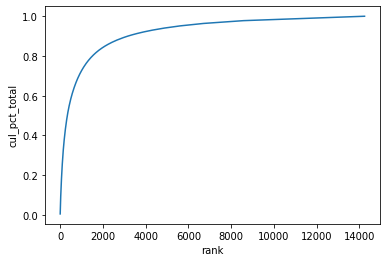

In [156]:
#Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc_nostop);

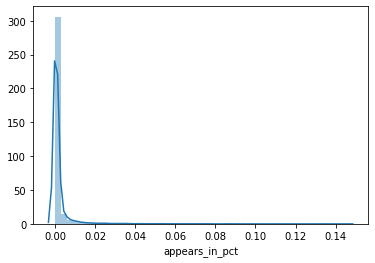

In [157]:
# Frequency of appearance in documents
sns.distplot(wc_nostop['appears_in_pct']);

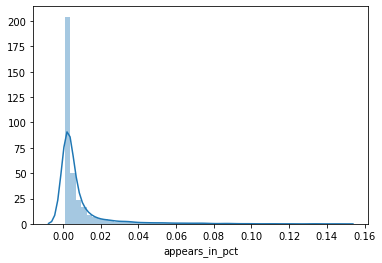

In [158]:
# Tree-Map w/ Words that appear in a least 0.1% (approximately 7) documents. 
wc_short = wc_nostop[wc_nostop['appears_in_pct'] > 0.001]
sns.distplot(wc_short['appears_in_pct']);

In [159]:
wc_short['appears_in_pct'].describe()

count    3339.000000
mean        0.008189
std         0.014751
min         0.001050
25%         0.001576
50%         0.002889
75%         0.007353
max         0.145089
Name: appears_in_pct, dtype: float64

In [160]:
x = 100*(1-3343/14262)
# print(f'By removing words appearing in less than 0.1% of documents the database is reduce by', {x:.2f}, 'percent.')
print(f'By removing words appearing in less than 0.1% of documents the database is reduced by', x, 'percent.')

By removing words appearing in less than 0.1% of documents the database is reduced by 76.56008974898332 percent.


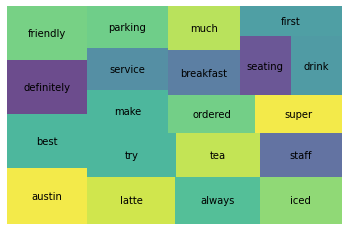

In [161]:
wc_short_top20 = wc_short[wc_short['rank'] <= 20]

squarify.plot(sizes=wc_short_top20['pct_total'], label=wc_short_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [164]:
wc_bad = count(df_bad['nostop_tokens_2'])
print(wc_bad.shape)

(7069, 7)


In [166]:
wc_good = count(df_good['nostop_tokens_2'])
print(wc_good.shape)

(12477, 7)


(14238, 7) (7069, 7) (12477, 7)


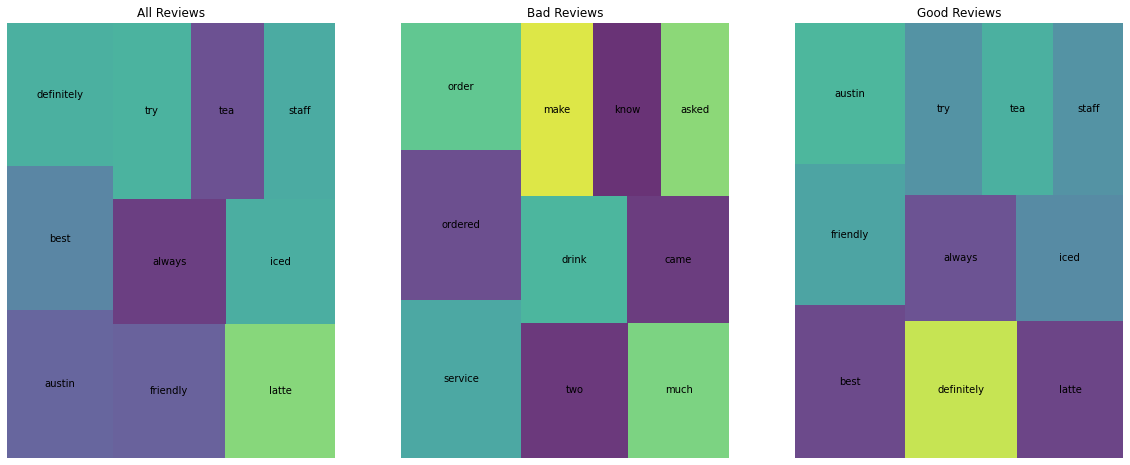

In [167]:
# Visualize top words for all reviews, bad reviews, good reviews
wc_all = count(shops['nostop_tokens_2'])
print(wc_all.shape, wc_bad.shape, wc_good.shape)

# Get top 20 word occurences for each set of data
wc_10 = wc_all[wc_all['rank'] <= 10]
wc_bad_10 = wc_bad[wc_bad['rank'] <= 10]
wc_good_10 = wc_good[wc_good['rank'] <= 10]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_10['pct_total'], label=wc_10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_10['pct_total'], label=wc_bad_10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Good Reviews')
squarify.plot(sizes=wc_good_10['pct_total'], label=wc_good_10['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

